# Day 3 Project Challenge

Find the original Notebook with detailed instructions by **Daniel Pass** [here](https://github.com/passdan/PracticalPythonProgrammingForBiologists/blob/main/Day1/P34B-Day1-project.ipynb).

> We have been investigating the upstream sequence region of P2X1 and have data on Transcription Factor Binding Sites. I want you to write code to analyse the data collected and automatically output some interpretation in easy to read format (ready for a non-computer prof. to understand!).
>
> You have been given the following data,
>
>* A region of DNA that we're investigating
>* A list of binding sites with their sequence and position
>* A 2D list of binding sequence motifs and their frequency
>
> There are infinite different ways to answer these questions and no true correct answer. Think about the approaches you might try first in normal languange, and then think how you would achive it with python. Take your time, this is a big collection of chalenges that should take 30+ minutes!

In [57]:
### INPUT DATA ###

# Upstrem region of interest (as a string)
region = "AATTATTTACTTAGCTAGGAGTGTGAGCTTGAGGGCGGGTCTAATGAGTAGGTCAGAGTCAGCCTGGCACAGCAAGAATGAAATAATTTTTTTTTTGAGATAAGGTCTTGCTCTGCCACCCAGGCAATGGTGTGATCATAGGTCACTGTAACCTCAAACTCTTGGGCTCAAGTGATCCTCCTGCATAGTTGGTATTACTTAGCTAGGAGTGTGAGCTTGAGGGCGGGTCTAATGAGTAGGTCAGAGTCCCTGGCACAGCAAGAATGAAATAATTTTTTTTGAGATAAGGTCTTGCTCTGCCACCCAGGATGGAGTGCAATGGTGTGATCATAGGTCACTGTAACCTCAAACTCTTGGGCTCAAGTGATCCTCCTGCGTTGGTATTACTTAGCTAGGAGTGTGAGCCGGAGGGCGGGTTTTTTTTGAGACAAGGTCTTGCCCCGCCACCCAGGAGGGAGTGCGCTGGTGTGATCATAGGTCACTGTAACCTCAAACTCTTGGGCTCGCGTGATCCCCCGGC"

# The list of binding motifs confirmed by your CHIPSeq experiment and first base binding in region
TFBS_experimental = ["AGGTC", "TGATC", "GGTCT"]
confirmed_binding_sites = [139, 468, 225]

# Sequence motifs found in the region, and frequency
in_silico_sites = [('AATGA', 4), ('CATAG', 4), ('GGAGT', 5), ('GAGTG', 5), ('GGTCT', 5), ('TAGGT', 5), ('GGTCA', 5), ('GTGTG', 6), ('TGTGA', 6), ('TTGAG', 6), ('TCTTG', 6), ('GTGAT', 6), ('TGATC', 6), ('CTCAA', 6), ('AGGTC', 8), ('TTTTT', 14)]

The region of interest is 520 nucleotides long and has an AT content of 51.15%.

Subsection 1 has an AT content of 18.65%.
Subsection 2 has an AT content of 17.88%.
Subsection 3 has an AT content of 14.62%.


TFBS1,
-----AGGTC-----
ATCATAGGTCACTGT

TFBS2,
-----TGATC-----
TGGTGTGATCATAGG

TFBS3,
-----GGTCT-----
GGGCGGGTCTAATGA



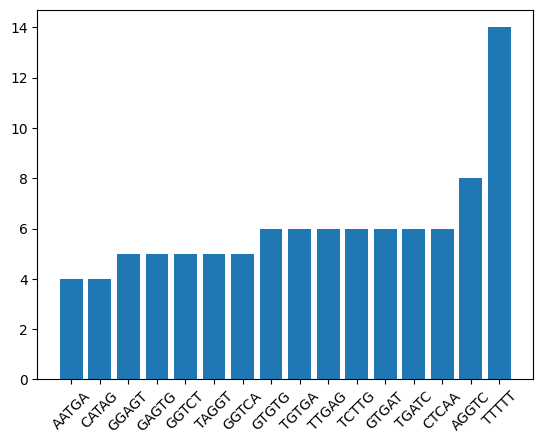

In [66]:
import matplotlib.pyplot as plt

# Calculate the length of the region being studied and total AT%
length = len(region)

def ATcalculator(sequence):
    ATperc = round((sequence.count('A') + sequence.count('T')) / length * 100, 2)

    return ATperc

ATtot = ATcalculator(region)

print(f"The region of interest is {length} nucleotides long and has an AT content of {ATtot}%.\n")

# Divide the region into three equal sections and report if AT% is different between them

starting = 0
count = 1
for ending in range(int(length/3),length,int(length/3)):
    subsec = region[starting:ending]
    ATperc = ATcalculator(subsec)
    starting += int(length/3)

    print(f"Subsection {count} has an AT content of {ATperc}%.")
    
    count += 1

print('\n')

# Print the DNA sequence of your experimental binding motifs with the related binding section of the long region
experimental_2D = list((zip(TFBS_experimental, confirmed_binding_sites)))


count = 0
for motif,starting in experimental_2D:

    length = len(motif)

    binding_site = region[starting-5:starting+length+5]

    print(f"TFBS{count+1},")
    print(f"{'-' * 5}{motif}{'-' * 5}")
    print(f"{binding_site}\n")

    count += 1


# Make a bar chart showing frequency of in silico predictions
motifs = dict(in_silico_sites).keys()
freq = dict(in_silico_sites).values()

plt.bar(motifs, freq)
plt.xticks(rotation = 45)
plt.show()